<a href="https://colab.research.google.com/github/wavallejol/Entropy/blob/main/Sesi%C3%B3n8_Probabilidad%26Entrop%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>

🔴  🔴  🔴 ⬇️ **Primero importaremos las librerias que utilizaremos** ⬇️ 🔴  🔴  🔴

In [2]:
from random import *
from pylab import *
from math import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb, factorial

# **Sesión 8. Entropía y Probabilidad**
***William Vallejo***
# **Objetivos**
 
1.   Apropiar conceptos basicos de probabilidad utilizando Google Colabs.
2.   Entender la relación entre entropía y probabilidad
3.   Verificar la dependencia de la entropía con el tiempo y el numero de partículas que componen el sistema.
---



# **1. Introducción**

<div align="justify">

Normalmente, la temperatura se interpreta fácilmente como cierta medida de la energía molecular media y la energía interna se interpreta como la energía molecular total. Sin embargo, la interpretación de la  <a href="https://en.wikipedia.org/wiki/Entropy"> Entropía</a> puede llegar a ser complicada por el grado de abstracción que normalmente presenta el formalismo matemático. Es así que a pesar de realizar el calculo del cambio de ΔS en varios procesos, es común que no se logre disponer de una imagen clara de la naturaleza fisicoquímica de la entropía. Aunque la entropía no admite una interpretación tan sencilla como la temperatura o la energía interna, en esta experiencia se tratará de abordar su significado por medio de una simulación apoyada en conceptos probabilísticos (levine, 1996).

</div>

# **2. Actividades**



# **Actividad 1. El número de la suerte**

<div align="justify">

En el juego de los dados normalmente apostamos un numero entre (1-12), ¿cual es el número que tiene mayor probabilidad de repetirse después de una serie de lanzamientos?. Podríamos resolver esta pregunta realizando el lanzamiento de un par de dados y verificar el resultado para tabular las respuestas y verificar cualquiera el resultado que mas se repetiría. ¿Cuantos lanzamientos deberíamos realizar para estar seguro? 10, 100, 1000, 2000, 5000 10000, 20000, 30000. Se decidieramos que realizar 😱😱😱 30000 😱😱😱 lanzamientos sería adecuado, esta tarea seria muy tediosa y repetitiva 🙈🙈🙈🙈. Afortunadamente contamos con nuestras computadoras para realizar este tipo de tareas. 

A continuación, encontrarás una rutina que muestra el resultado que obtendrías después de lanzar dos dados un numero definido de veces. Ejecuta la rutina en la celda de código que encontrarás a continuación: 

Podrás elegir el número de lanzamientos que deseas realizar (elige un numero entre 1 y 30000) se  elige este limite para garantizar que el calculo no tomara mas de 40 segundos). Veamos a como afecta el resultado obtenido el numero lanzamientos que realizamos. 

(i) Corre la simulación y elige 10 lanzamientos, toma un pantallazo de la curva, luego vuelve a correr la rutina y a ahora (ii) elige 100 lanzamientos y toma un pantallazo de la curva, ahora vuelve a correr la rutina y (iii) elige 1000 lanzamientos y toma un pantallazo de la curva, ahora vuelve a correr la rutina y (iv) elige 10000 lanzamientos y toma un pantallazo de la curva, (v) elige 20000 lanzamientos y toma un pantallazo de la curva. Finalmente, elige 30000 lanzamientos y toma un pantallazo de la curva. Realiza una pequeña discusión sobre el efecto del número de lanzamientos en la tendencia de las curvas obteindas. ¿Conforme aumenta el número de lanzamientos cual es el resultado que presenta mayor porbabilidad? ¿Por que?

Explica que es la distribución Normal. Puedes leer este link: <a href="https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal"> Distribución Normal</a>

</div>

Ingresa el numero de lanzamientos (1-30000):100
Probabilidad resultado número 7 después de 100 lanzamientos = 20.00 %


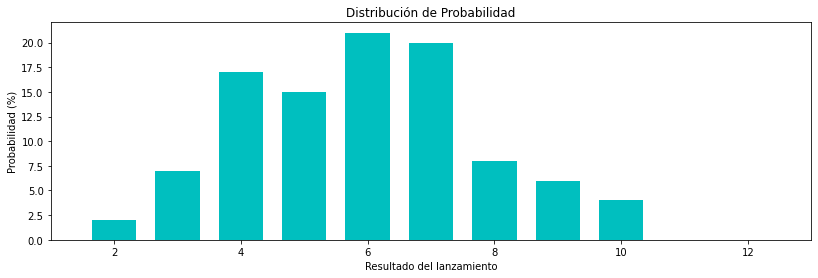

In [ ]:
d=int(input("Ingresa el numero de lanzamientos (1-30000):")) # numero de lanzamientos

y=range(1,d+1,1)
z=[]
s=[]

for i in y:
 x = randint(1,6)
 x1= randint(1,6)
 z.append(x+x1)
 nz=np.array(z)

lanza=np.arange(1,13,1)

for i in range(1,13,1):
  conteo=z.count(i)
  s.append(conteo)
  ns=np.array(s)

plt.figure(figsize=(30,4))
plt.subplot(1,2,1)
plt.xlim(1,13,1)
plt.bar(lanza,ns*100/d, width=0.7, color="c")
plt.title("Distribución de Probabilidad")
plt.ylabel("Probabilidad (%)") 
plt.xlabel("Resultado del lanzamiento") 
print(f"Probabilidad resultado número 7 después de {d} lanzamientos = {z.count(7)*100/d:.2f} %")

# **Actividad 2. Partículas de gas en una caja**

Considere el siguiente ejemplo: La mezcla de dos volúmenes iguales de n partículas indistinguibles de un gas ideal en un sistema aislado a temperatura y presión constantes (ver figura 1). 
<center>
 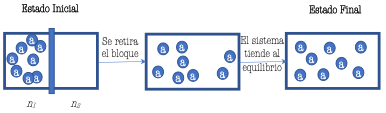
  </a>
  
  Figura 1. Mezcla irreversible de n particula de un gas ideal a T y P constantes (con n=8). Adaptada de (levine, 1996).
</center>


El movimiento de las moléculas del gas es completamente aleatorio, y las moléculas no interaccionan entre sí. En el primer instante las partículas estarán separadas por un bloque agrupadas al costado izquierdo de la caja, luego el bloque es retirado y las partículas tendrán libertad de movimiento. Las partículas solo tendrán dos opciones de localización: (i) el lado izquierdo de la caja ($\small n_1$) y (ii) el lado derecho de la caja  ($\small n_1$). Experimentalmente se observa que después un tiempo el sistema evoluciona de acuerdo a lo mostrado en la figura 1 (para una coja con $\small n=8$). 

Después de ver la figura 1 surgen dos incógnitas ¿Por qué el estado final en la figura 1 es el estado de equilibrio y el estado inicial es un estado de no equilibrio? ¿Por qué el paso del estado inicial sin mezclar al estado de mezclado (estado final) es irreversible?

Simulación

En la siguiente celda de código encontrarás una rutina que simula el comportamiento de las partículas en una caja como la mostrada en la figura 1, podrás definir el numero partículas que inicialmente se tiene a un lado de la caja y el numero de pasos de la simulación (en nuestro caso representaran el tiempo que transcurre en la simulación). (A. Malthe-Sørenssen & D. Dysthe 2017)

Efecto del tiempo:

(a) Fije en el numero total de partículas de gas en 100. Fije el numero de pasos de la simulación en 50 y corra la simulación. Realice captura de pantalla de la curva obtenida. 

(b) Repita el paso anterior cambiando únicamente el numero de pasos de la simulación a 100, 200, 400 y 500. Realice captura de pantalla de las curvas obtenidas.

Efecto del Numero partículas:

(c) Ahora, fije en el numero total de partículas en 500. Fije el numero de pasos de la simulación en 50 y corra la simulación. Realice captura de pantalla de la curva obtenida. 

(d) Repita el paso anterior cambiando únicamente el numero de pasos de la simulación a 100, 200, 400, 500, 1000 y 2000. Realice captura de pantalla de las curvas obtenidas.

Con la información obtenida responda:

(e) ¿El tiempo máximo utilizado permitió que el sistema alcanzara el equilibrio? 

(f) ¿Considera que se requiere mas tiempo?

Ingrese el numero de partículas de gas (1-1000) = 100
Ingrese el numero de steps de la simulación (1-10000) = 1000
Source code: Sørenssen & Dysthe (2017)


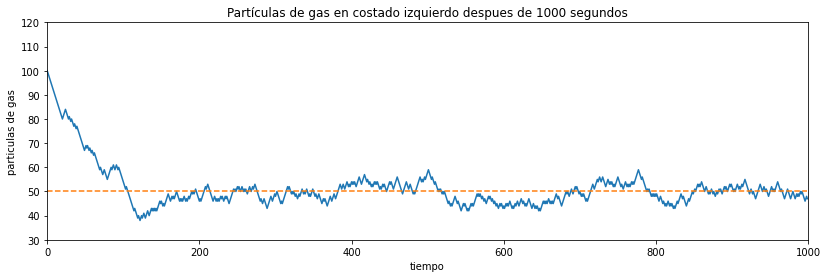

In [ ]:
N=int(input("Ingrese el numero de partículas de gas (1-1000) = "))
nstep=int(input("Ingrese el numero de steps de la simulación (1-10000) = "))
n=zeros(nstep)
m=ones(nstep)*N/2
n[0]=N
for i in range(1,nstep):
  r=rand(1)
  if (r < n[i-1]/N ):
    n[i] = n[i-1] - 1
  else:
    n[i] = n[i-1] + 1

plt.figure(figsize=(30,4))
plt.subplot(1,2,1)
plt.plot(range(0,nstep),n)
plt.plot(range(0,nstep),m,linestyle='dashed')
plt.xlabel('tiempo')
plt.ylim(0.3*N,N+0.2*N)
plt.xlim(0,nstep)
plt.ylabel('particulas de gas')
plt.title(f"Partículas de gas en costado izquierdo despues de {nstep} segundos")
print("Source code: Sørenssen & Dysthe (2017)")

# **Actividad 3. Entropía**

<div align="justify">

La entropía de un sistema aislado es máxima en el equilibrio y desde el punto de vista macroscópico, un sistema en equilibrio se caracteriza por una distribución (configuración) de mayor probabilidad. El sistema avanza espontáneamente a través de varios macroestados con valores crecientes de probabilidad hacia el macroestado con el mayor número de configuraciones. La mecánica estadística esta relacionada con la probabilidad de diferentes estados energéticos y la entropía estadística se define como:


$\small S=k_Bln\Omega$

Donde $\small k_B$ es la constante de Boltzman $\small 1,380649×10^{–23} J/K.$,  y  $\small \Omega$ representa el peso estadístico (ó multiplicidad) que puede presentar el sistema. Se define como:


$\small \Omega =\frac{N!}{n_i!(N-n_i)!}$

Donde  ($\small N!$) representa el numero de todas las configuraciones (modos diferentes) de ordenar  ($\small N$) objetos diferentes (también conocido como permutaciones de  ($\small N$)),  ($\small n_1!$) representa el numero de configuraciones diferentes (modos diferentes) de modo que produzcan el mismo macroestado para el objeto ($\small n_1$). 

Calculo de la entropía: Efecto del Numero partículas:

En la siguiente actividad calcularemos la entropía del proceso redistribución de las partículas de gas mostrado en la figura 1. La rutina que se presenta en la siguiente celda de código determina el valor de Omega cuando una partícula de gas ha migrado del costado izquierdo de la caja al costado derecho. 

a) Fije en el numero total de partículas de gas en 8 y corra la simulación. Realice captura de pantalla de la curva obtenida. Verifique la información presentada en la tabla 1. b) Repita el paso anterior cambiando el numero total de partículas de gas a 100, 250, 500 y 1000. Realice captura de pantalla de las curvas obtenidas. c) ¿Cual es el macroestado mas probable? d) Compare el valor de multiplicidad para el ensayo de 8 y 1000 partículas de gas. e) Realice una discusión sobre las diferencias presentadas por las curvas obtenidas para cada ensayo. 

</div>

Ingrese el numero de partículas de gas (1-1000) = 100


Text(33.333333333333336, 0, 'Entropía (J/K)')

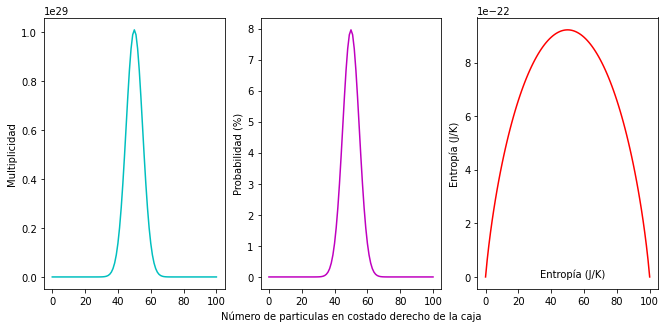

In [8]:
n=int(input("Ingrese el numero de partículas de gas (1-1000) = "))
k=np.arange(0,n+1,1)
KB=1.380649e-23 #J/K
C=comb(n,k)
s=sum(C)
S=KB*np.log(C)

plt.figure(figsize=(11,5))
plt.subplot(1,3,1)
plt.ylabel("Multiplicidad")
plt.plot(k,C,color="c")

plt.subplot(1,3,2)
plt.plot(k,C*100/s,color="m")
plt.ylabel("Probabilidad (%)")
plt.xlabel("Número de particulas en costado derecho de la caja")

plt.subplot(1,3,3)
plt.plot(k,S,color="r")
plt.ylabel("Entropía (J/K)")

---
#***3. Enlaces Recomendados***

*  `SciPy` Module. <a href="https://scipy.org/">scipy.org</a> 
*  `random` Module Numpy. <a href="https://docs.python.org/3.7/library/random.html">random — Generate pseudo-random numbers4</a> 

*  `numpy.random` Mudule Numpy. <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html#random-sampling-numpy-random">Simple random data</a> 

---
#***Referencias***

*  Levine, Ira N. Fisicoquímica. Mc Graw Hill, 4ª Ed. Madrid 1996. p. 114-121.
*  A. Malthe-Sørenssen, D. Dysthe. Statistical and Thermal Physics Using Python. 2017
*  N. M. Laurendeau. Statistical Thermodynamics: Fundamementals and Aplications. Cambrige University Press. ISBN 978-0-511-14062-4. 2005.<a href="https://play.google.com/store/books/details/Statistical_Thermodynamics_Fundamentals_and_Applic?id=BcCtAQAAQBAJ&gl=US"> (N. M. Laurendeau 2005)</a></div>

---